# ODEs : Structure of a relativistic, spherically symmetric star

To compute the structure i.e. $m(r)$ and $P(r)$ of a neutron star using the TOV equations

/home/uddeepta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


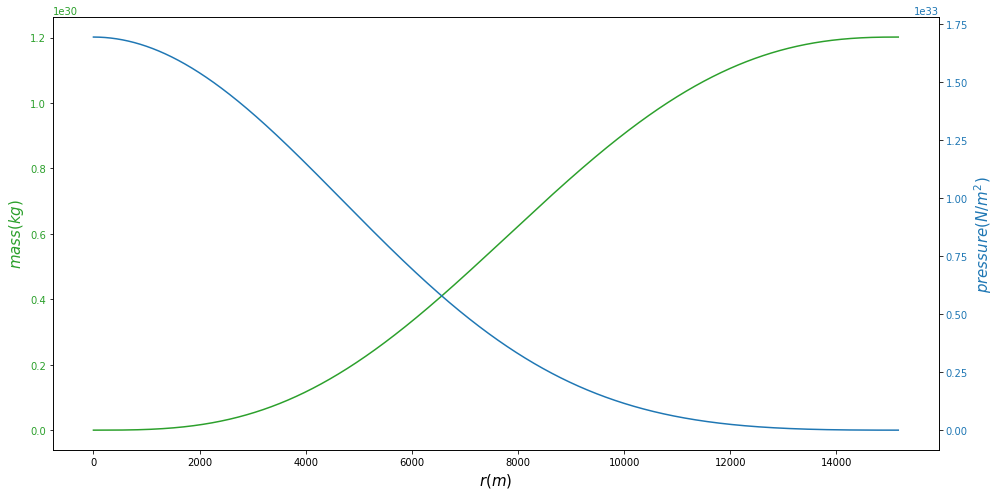

In [1]:
from pylab import *
from scipy.integrate import odeint

#Given parameters
rho0  = 5.0 * (10**17)              #central density
gamma = 5/3                         #polytropic index
K     = 5380.3                      #P(r)=K*rho(r)**gamma
del_r = 0.001                       #equivalent to the step size h
m0    = (4/3)*pi*rho0*(del_r**3)    #initialization of mass
G     = 6.67*(10**(-11))
c     = 3.0*(10**8)
P0    = K*(rho0**(5.0/3.0))

#density function
def rho(P):
    return (P/K)**(1/gamma)


#defining function to compute the mass and pressure as function of r
def mass_pressure(init_,r):             
    m     = init_[0]
    P     = init_[1]
    dm_dr = 4 * pi * rho(P) * (r**2)
    dP_dr = -(G*(rho(P) + (P/c**2))/r**2) * (m + (4*pi*r**3*P/c**2)) * (1-(2*G*m/(c**2*r)))**(-1)
    return [dm_dr,dP_dr]


initial  = [m0,P0]
r        = linspace(0.2,16000,16001)              #the range of r to be solved
soln     = odeint(mass_pressure, initial, r)      #calling the function
mass     = soln[:,0]
pressure = soln[:,1]


#plotting the results with dual y axis
fig = figure(figsize=(14,7))
ax1 = fig.add_subplot(111)

color = 'tab:green'
ax1.set_xlabel('$r(m)$',fontsize = 15)
ax1.set_ylabel('$mass(kg)$', color=color, fontsize = 15)
ax1.plot(r, mass, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axis that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$pressure(N/m^2)$', color=color, fontsize = 15)  # we already handled the x-label with ax1
ax2.plot(r, pressure, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
show()

Computing the mass $m_\star$ and radius $r_\star$ of the neutron star

In [2]:
for i in range(14000,15999):
    if isnan(pressure[i]):
        rstar=i-1
        break
mstar = soln[rstar,0]

print('Radius of the star is',rstar,'m')
print('Mass of the star is',mstar,'kg')

Radius of the star is 15166 m
Mass of the star is 1.201411343693551e+30 kg


Computing the lapse function $e^{2\phi(r)}$ for neutron star and black hole

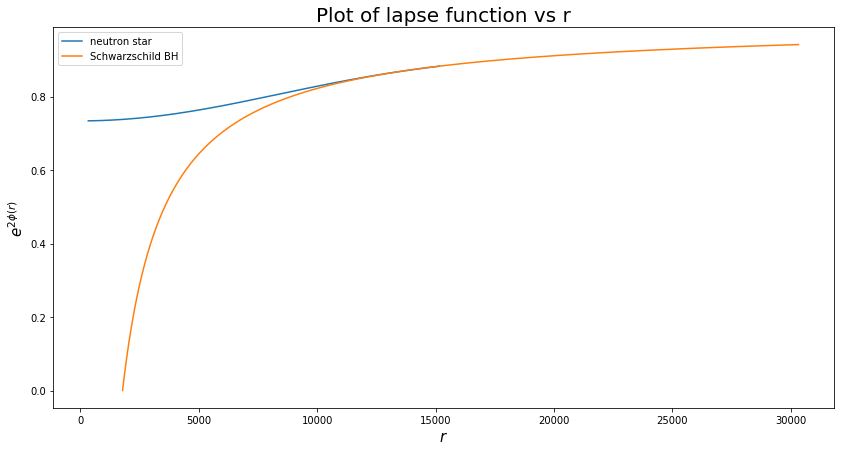

In [3]:
R    = linspace(0,rstar,rstar) #Array with radius of star 
Rinv = rstar-R                #the above array reversed ,as we need for evloving lapse phase from surface to centre
count= 1
def Lapsefun(phi, r_):
    r       = int(r_)
    dphi_dr = G*(mass[r] + 4*pi*(r**3)*pressure[r]/(c**2)) / ((c*r)**2 - 2*G*mass[r]*r)
    return dphi_dr

phi0   = 0.5*log(1.0 - 2.0*G*mstar/(rstar*(c**2)))
phi    = odeint(Lapsefun, phi0, Rinv)
lapse  = exp(2.0*phi)                    #lapse function for neutron star
r_s    = 2.0*G*mstar/c**2
r      = linspace (r_s, 2.0*rstar, 10000)
lapsch = 1.0-r_s/r        #lapse function for Schwarzschild Black Hole

figure(figsize=(14,7))
title  ("Plot of lapse function vs r", fontsize = "20")
plot   (Rinv, lapse, label = "neutron star")
plot   (r, lapsch, label = "Schwarzschild BH")
xlabel ("$r$", fontsize = '15')
ylabel ("$e^{2\phi (r)}$", fontsize = '15')
legend()
show()